In [1]:
# lets start with importing necessary library
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix ,roc_auc_score,roc_curve,classification_report
import statsmodels as sm
import matplotlib.pyplot as plt    
import scikitplot as skplt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read csv  file with pandas 
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Micro credit defaulter.csv")
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [4]:
data.drop(columns=['Unnamed: 0','pcircle'],axis=1,inplace=True) #unnamed and pcircle only one category no use of it, so delete now

In [5]:
data.shape

(209593, 35)

In [6]:
data.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

pcircle ,pdate ,msisdn  are object data,rest are integer and float,

In [8]:
#check unique value in dataset
data.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [9]:
#check how many unique value present msisdn
data['msisdn'].unique()

array(['21408I70789', '76462I70374', '17943I70372', ..., '22758I85348',
       '59712I82733', '65061I85339'], dtype=object)

In [10]:
#checking for missing values
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

no missing values

Encoding of Categorical Data

In [11]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()

In [12]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=ord.fit_transform(data[i].values.reshape(-1,1))

In [13]:
data.head()

label    msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0   40191.0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  142291.0  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1   33594.0  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  104157.0  241.0     21.228000     21.228000    159.42    159.42   
4      1    6910.0  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  pdate  
0                 0.0  29.000000  29.000000   49.0  
1                 0.0   0.000000   0.000000   70.0  
2                 0.0   0.000000   0.000000   79.0  
3                 0.0   0.000000   0.000000    5.0  
4                 0.0   2.333333   2.333333   21.0

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape # so no duplicates same number as earlier

(209592, 35)

In [16]:
data.describe()

label         msisdn            aon   daily_decr30  \
count  209592.000000  209592.000000  209592.000000  209592.000000   
mean        0.875177   93100.358902    8112.380399    5381.412999   
std         0.330519   53758.424281   75696.261220    9220.644093   
min         0.000000       0.000000     -48.000000     -93.012667   
25%         1.000000   46505.750000     246.000000      42.439500   
50%         1.000000   93072.500000     527.000000    1469.091833   
75%         1.000000  139625.250000     982.000000    7244.096000   
max         1.000000  186242.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209592.000000  209592.000000  209592.000000      209592.000000   
mean     6082.529123    2692.578912    3483.407309        3755.865715   
std     10918.836919    4308.596841    5770.475034       53906.020204   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.691917     280.417500     300.260000           1.000000   
50%      1500.000000    1083.540000    1334.000000           3.000000   
75%      7802.795000    3356.945000    4201.792500           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209592.000000     209592.000000  209592.000000  209592.000000   
mean         3712.220632       2064.458973       3.978053    3737.372947   
std         53374.960145       2370.790003       4.256099   53643.752523   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209592.000000         209592.000000         209592.000000   
mean         7704.496570           1812.819258           3851.945862   
std         10139.645685           2070.869474          54006.502647   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209592.000000  209592.000000      209592.000000         209592.000000   
mean        6.315437       7.716812       12396.236149           1864.597375   
std         7.193487      12.590273       16857.832129           2081.685508   
min         0.000000       0.000000           0.000000              0.000000   
25%         2.000000       0.000000        2317.000000            773.000000   
50%         4.000000       2.000000        7226.000000           1539.000000   
75%         8.000000       8.000000       16000.000000           1924.000000   
max       336.000000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209592.000000  209592.000000  209592.000000  209592.000000   
mean              92.025522     262.579362    3749.512336       0.041495   
std              369.216539    4183.907920   53885.542905       0.397557   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000

<AxesSubplot:xlabel='aon', ylabel='Density'>

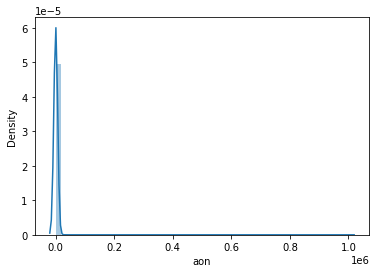

In [17]:
sns.distplot(data['aon'])

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

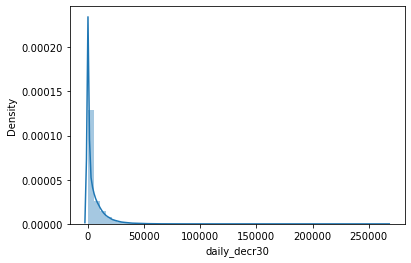

In [18]:
sns.distplot(data['daily_decr30'])

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

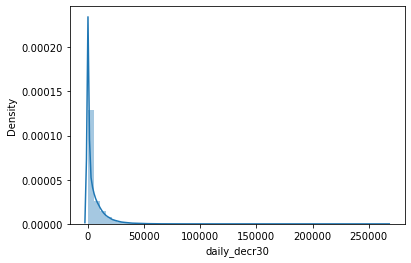

In [19]:
sns.distplot(data['daily_decr30'])

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

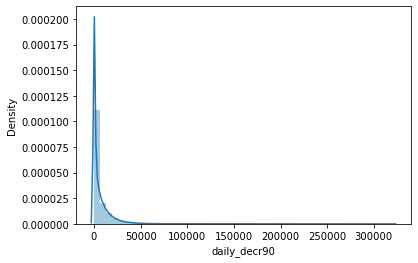

In [20]:
sns.distplot(data['daily_decr90'])

<AxesSubplot:xlabel='rental30', ylabel='Density'>

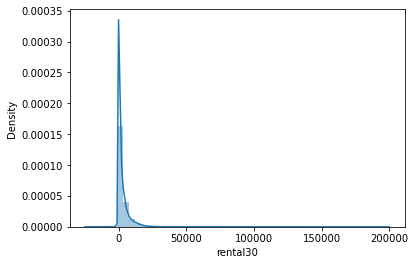

In [21]:
sns.distplot(data['rental30'])

<AxesSubplot:xlabel='rental90', ylabel='Density'>

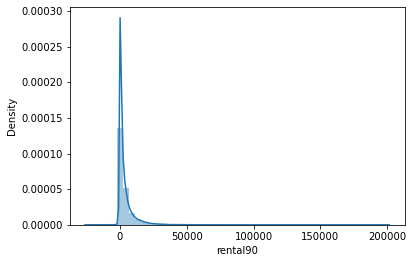

In [22]:
sns.distplot(data['rental90'])

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

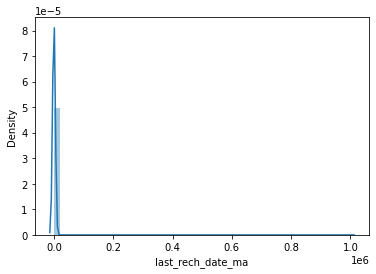

In [23]:
sns.distplot(data['last_rech_date_ma'])

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

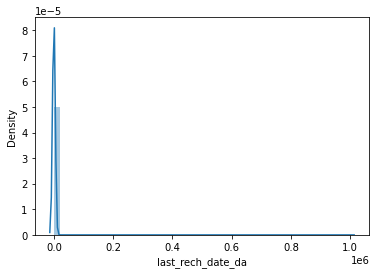

In [24]:
sns.distplot(data['last_rech_date_da'])

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

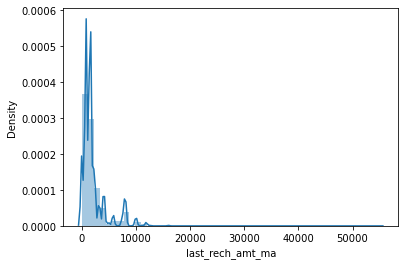

In [25]:
sns.distplot(data['last_rech_amt_ma'])

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

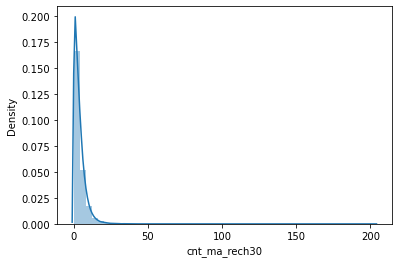

In [26]:
sns.distplot(data['cnt_ma_rech30'])

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

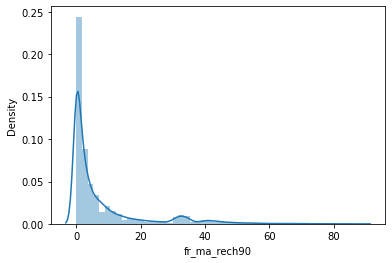

In [27]:
sns.distplot(data['fr_ma_rech90'])

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

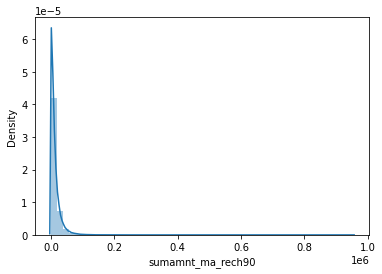

In [28]:
sns.distplot(data['sumamnt_ma_rech90'])

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

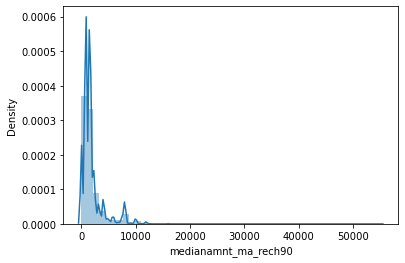

In [29]:
sns.distplot(data['medianamnt_ma_rech90'])

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

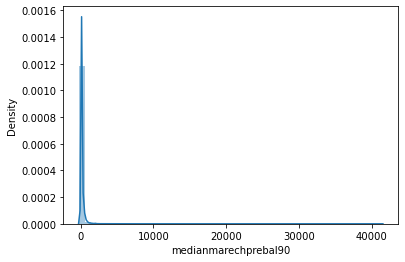

In [30]:
sns.distplot(data['medianmarechprebal90'])

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

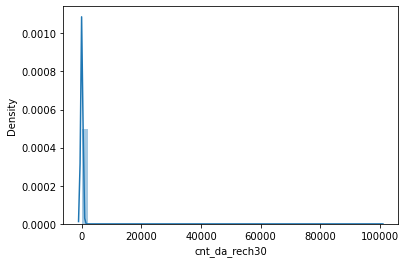

In [31]:
sns.distplot(data['cnt_da_rech30'])

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

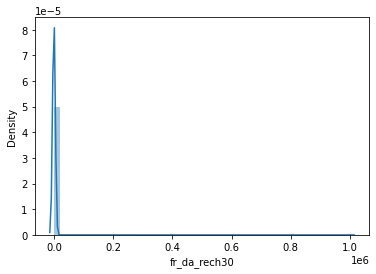

In [32]:
sns.distplot(data['fr_da_rech30'])

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

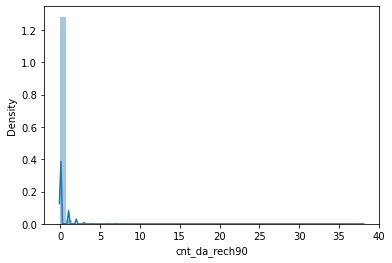

In [33]:
sns.distplot(data['cnt_da_rech90'])

<AxesSubplot:xlabel='fr_da_rech90', ylabel='Density'>

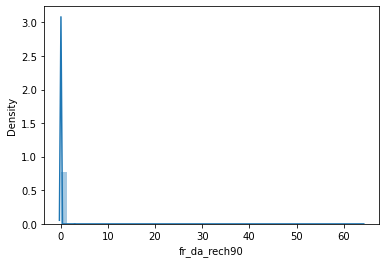

In [34]:
sns.distplot(data['fr_da_rech90'])

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

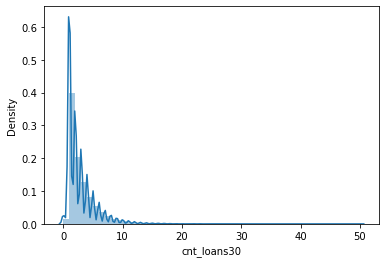

In [35]:
sns.distplot(data['cnt_loans30'])

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

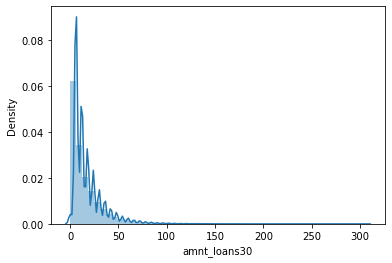

In [36]:
sns.distplot(data['amnt_loans30'])

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

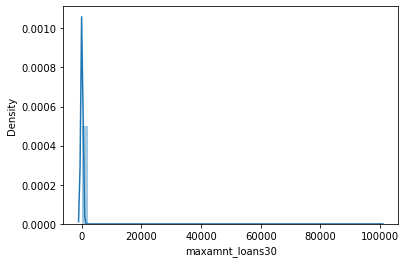

In [37]:
sns.distplot(data['maxamnt_loans30'])

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Density'>

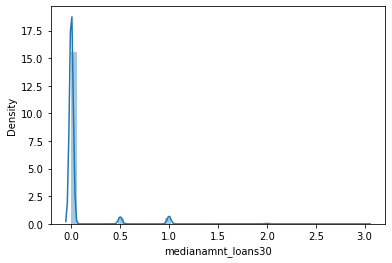

In [38]:
sns.distplot(data['medianamnt_loans30'])

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

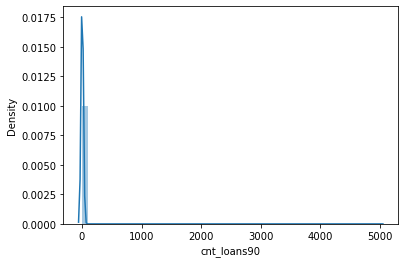

In [39]:
sns.distplot(data['cnt_loans90'])

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

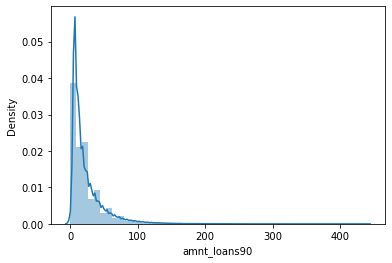

In [40]:
sns.distplot(data['amnt_loans90'])

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

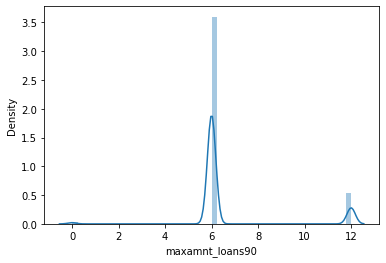

In [41]:
sns.distplot(data['maxamnt_loans90'])

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='Density'>

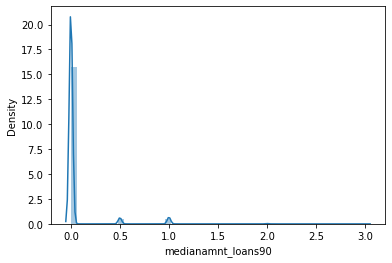

In [42]:
sns.distplot(data['medianamnt_loans90'])

<AxesSubplot:xlabel='payback30', ylabel='Density'>

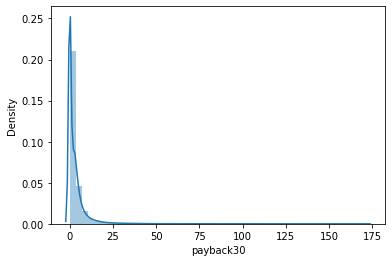

In [43]:
sns.distplot(data['payback30'])

<AxesSubplot:xlabel='payback90', ylabel='Density'>

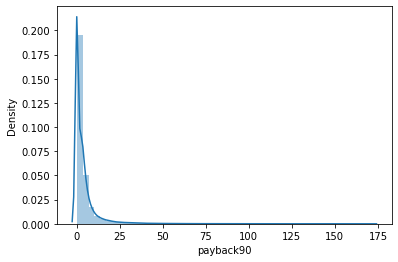

In [44]:
sns.distplot(data['payback90'])

so based on distribution plot all data are right skewed and have many outliers 

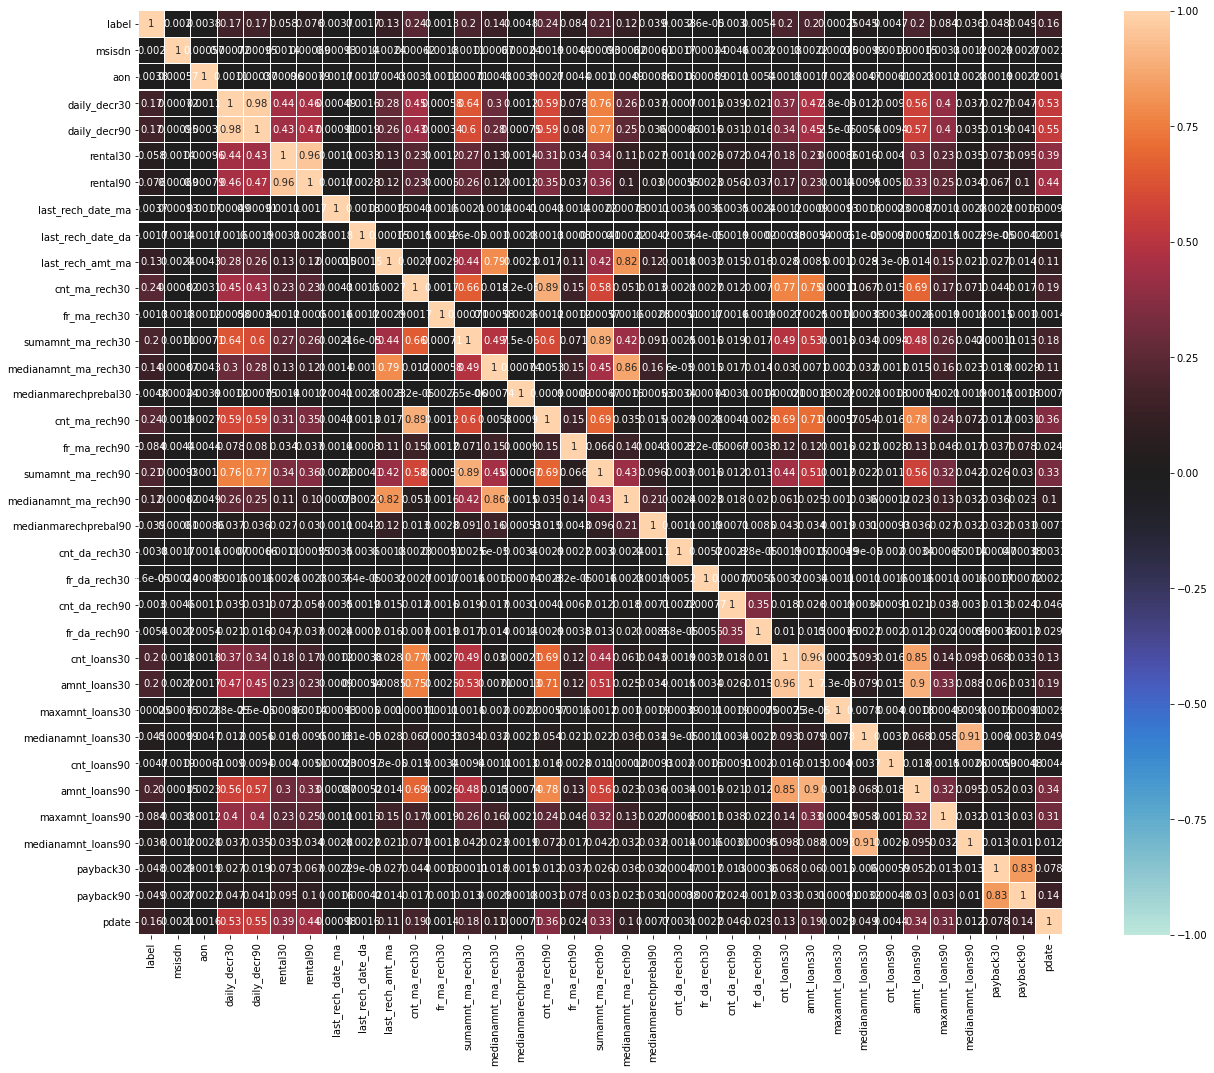

In [45]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

check correlation between features which have highest score

<AxesSubplot:xlabel='payback30', ylabel='payback90'>

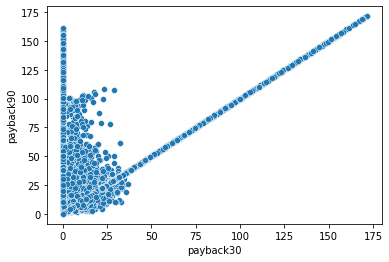

In [46]:
#scatter plot to check correlation
sns.scatterplot(x='payback30',y='payback90',data=data)

Weak correlation between payback90 vs payback30

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='medianamnt_loans90'>

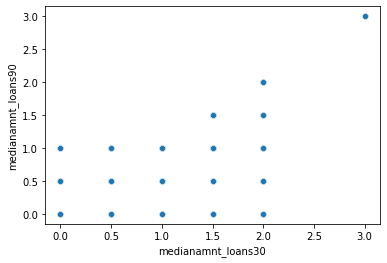

In [47]:
#scatter plot to check correlaion
sns.scatterplot(x='medianamnt_loans30',y='medianamnt_loans90',data=data)

weak correlation between medianamnt_loans30, and medianamnt_loans90 

<AxesSubplot:xlabel='amnt_loans30', ylabel='cnt_loans30'>

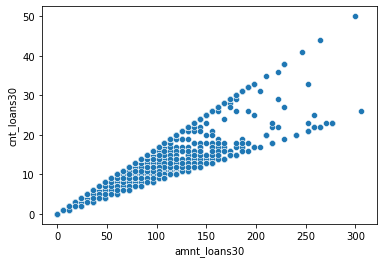

In [48]:
sns.scatterplot(x='amnt_loans30',y='cnt_loans30',data=data)

<AxesSubplot:xlabel='daily_decr30', ylabel='daily_decr90'>

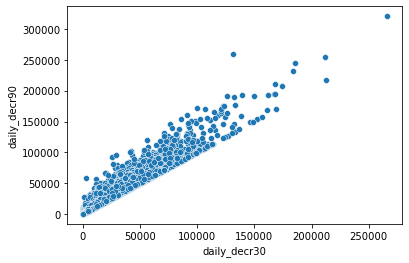

In [49]:
sns.scatterplot(x='daily_decr30',y='daily_decr90',data=data)

strong linear correlation between daily_decr30 and daily_decr90

<AxesSubplot:title={'center':'correlation with target'}>

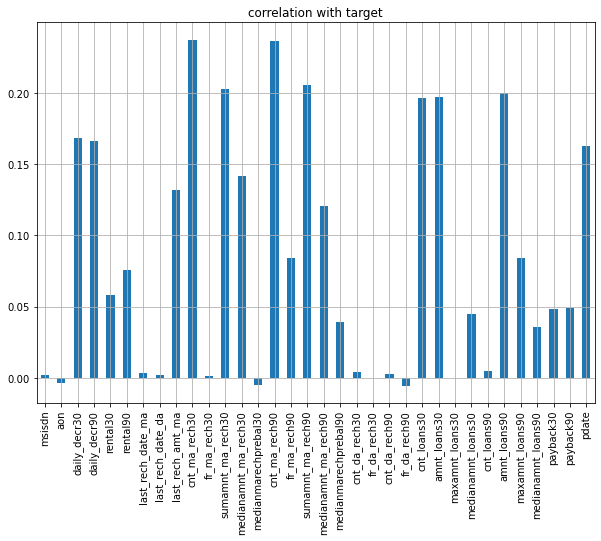

In [18]:
#take same data and visualize the correlation with class 
data.drop('label',axis=1).corrwith(data.label).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')

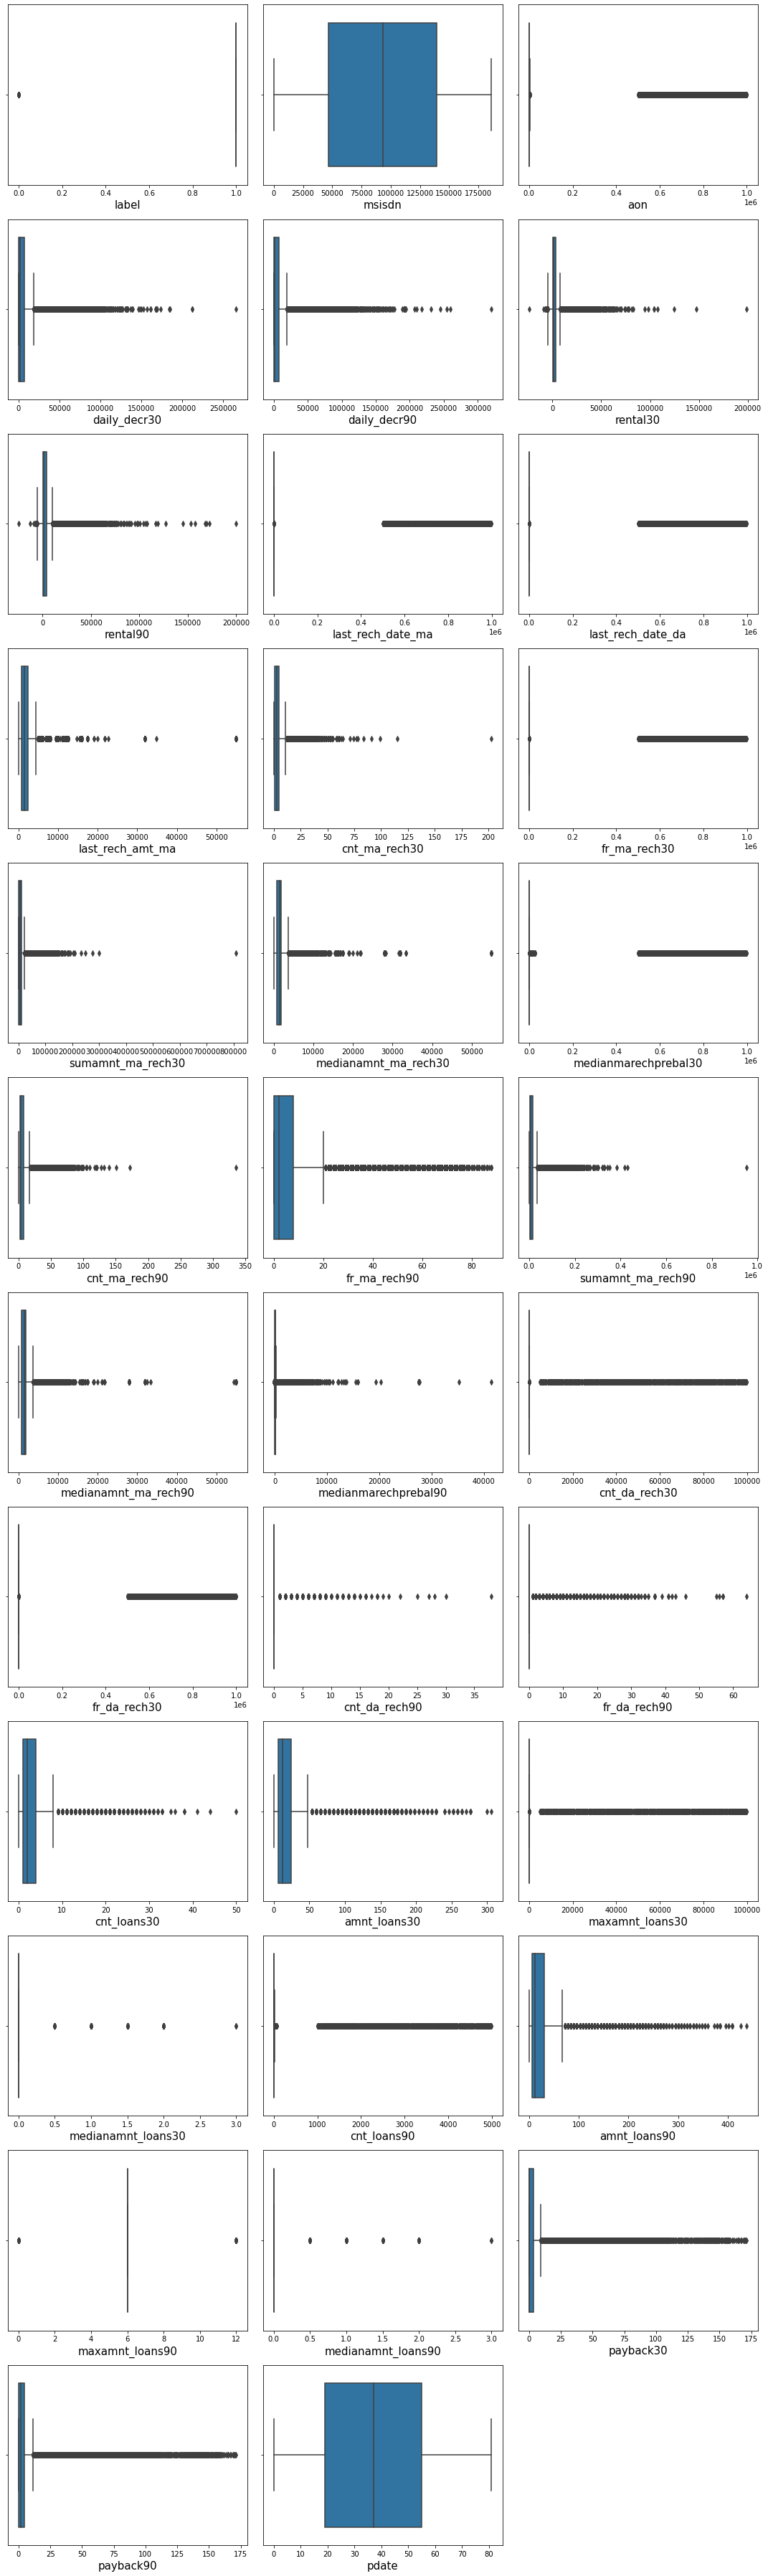

In [19]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=35:
        ax=plt.subplot(12,3,graph)
        ax=sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

msisdn,pdate only dont have outliers rest column right skewed and many outliers 

In [20]:
#remove outliers with z score
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(data))
z

array([[2.64788862, 0.98420826, 0.1035771 , ..., 2.90485222, 2.39418491,
        0.52240239],
       [0.37765939, 0.91503349, 0.09776438, ..., 0.38562571, 0.41922778,
        1.477399  ],
       [0.37765939, 1.1069242 , 0.10010268, ..., 0.38562571, 0.41922778,
        1.88668326],
       ...,
       [0.37765939, 0.72742929, 0.09378795, ..., 0.06823331, 0.04733989,
        0.93168665],
       [0.37765939, 0.34018268, 0.08428944, ..., 0.38562571, 0.59942165,
        0.74978253],
       [0.37765939, 0.52387526, 0.08628426, ..., 0.38562571, 0.41922778,
        0.06878599]])

In [21]:
print('row number\n', np.where(z>5.8)[0])
print('column number\n', np.where(z>5.8)[1])

row number
 [    30     53     65 ... 209530 209532 209575]
column number
 [7 7 2 ... 8 7 2]


In [22]:
index=np.where(z>5.8)[0]

In [23]:
df=data.drop(data.index[index])
df.shape

(193322, 35)

In [24]:
#calculation of dataloss after removing outliers
dataloss=((209592-193322)/193322)*100
dataloss

8.41601059372446

data is important so cant loss huge data to remove outliers 8% data loss quite okay

In [25]:
#check skewness in dataset
data.skew()

label                   -2.270245
msisdn                   0.000728
aon                     10.392923
daily_decr30             3.946219
daily_decr90             4.252553
rental30                 4.521921
rental90                 4.437670
last_rech_date_ma       14.790938
last_rech_date_da       14.814821
last_rech_amt_ma         3.781141
cnt_ma_rech30            3.283838
fr_ma_rech30            14.772797
sumamnt_ma_rech30        6.386774
medianamnt_ma_rech30     3.512314
medianmarechprebal30    14.779840
cnt_ma_rech90            3.425244
fr_ma_rech90             2.285415
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752696
medianmarechprebal90    44.880396
cnt_da_rech30           17.818321
fr_da_rech30            14.776395
cnt_da_rech90           27.267213
fr_da_rech90            28.988013
cnt_loans30              2.713426
amnt_loans30             2.975720
maxamnt_loans30         17.658009
medianamnt_loans30       4.551031
cnt_loans90             16.594368
amnt_loans90  

Skewness present in dataset lets remove skewness with PowerTransformer method

In [26]:
#removing skewness with PowerTrasform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
print(pt.fit(data))

PowerTransformer()


In [27]:
#lets divide our features and label
X=data.drop(columns='label')
Y=data['label']

<AxesSubplot:xlabel='label', ylabel='count'>

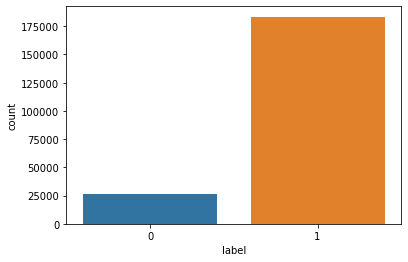

In [28]:
#count plot to check class is balanced 
sns.countplot(x='label',data=data)

Class is imbalanced need to balanced it first

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7,stratify=Y)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7)

In [31]:
from sklearn.utils import resample

In [32]:
x=pd.concat([x_train,y_train],axis=1)

In [33]:
label_Yes=x[x.label==1]
label_No=x[x.label==0]

In [34]:
#upsamling minority
sampled=resample(label_Yes,replace=True, #sample with replacement
                   n_samples=len(label_No), #match number is majority class
                    random_state=27) #reproduciable result

In [35]:
#combine majority and upsamled minority
upsample =pd.concat([sampled,label_No])

In [36]:
#check new class counts   #upsampling use when dataset is small
upsample.label.value_counts()

1    18165
0    18165
Name: label, dtype: int64

In [37]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=log_reg.predict(x_test)

In [41]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8736974693690599

In [42]:
#model score
log_reg.score(x_train,y_train)

0.8770627377635278

In [43]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[  152,  6537],
       [   81, 45628]], dtype=int64)

In [44]:
auc=roc_auc_score(y_pred,y_test)
auc

0.763523303614439

In [45]:
#Cross validation of model
from sklearn.model_selection  import  cross_val_score

In [46]:
cross_val_score(log_reg,X_scaler,Y,cv=5).mean()

0.8762834450055934

Model score is close to cross validation score so our model trained accurate but still need to hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
Lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],
               'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [49]:
grid_Lr = GridSearchCV(Lr, param_grid = grid_values,scoring = 'recall')
grid_Lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [50]:
grid_Lr.score(x_train,y_train)

0.9993755491174185

In [51]:
#Predict values based on new parameters
y_pred = grid_Lr.predict(x_test)

In [52]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.01      0.01      6689
           1       0.87      1.00      0.93     45709

    accuracy                           0.87     52398
   macro avg       0.74      0.50      0.47     52398
weighted avg       0.84      0.87      0.81     52398



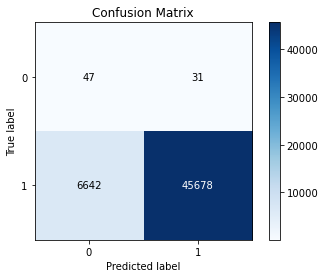

In [53]:
#confusion matrxi
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

In [86]:
#cross validation of model post tuning
cross_val_score(grid_Lr,X_scaler,Y,cv=5).mean()

0.9992640244234858

# DecesionTree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
y_pred=dt.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8821519905339898


In [89]:
#Model score
dt.score(x_train,y_train)

0.9999936384340369

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

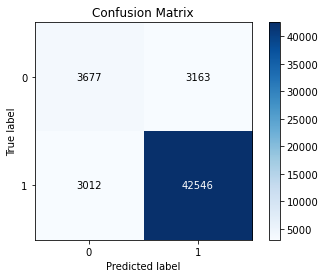

In [90]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [91]:
#classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54      6840
           1       0.93      0.93      0.93     45558

    accuracy                           0.88     52398
   macro avg       0.74      0.74      0.74     52398
weighted avg       0.88      0.88      0.88     52398



In [92]:
#Cross validation score of model
cross_val_score(dt,X_scaler,Y,cv=5).mean()

0.8838171315016286

In [93]:
#we are tuning three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={'criterion':['gini','entropy'], #gini and entropy for classification
           'max_depth': range(2,16,3),
           'min_samples_leaf':range(1,16,2),
           'min_samples_split':range(2,10,2)}

In [94]:
#cv= cross validation ,n_jobs menas apply entire CPU to do the job so that in increase process speed
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1) 

In [95]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16, 3),
                         'min_samples_leaf': range(1, 16, 2),
                         'min_samples_split': range(2, 10, 2)})

In [99]:
#chose best parameters
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [100]:
#use these best paraeters now with Decesiontreeclassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_leaf=3,min_samples_split=4)

In [101]:
#now DecesionTreeClassifier model fit into train data and calcualte model score
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9251052839166889

In [102]:
y_pred=dt.predict(x_test)

In [103]:
#classification report post tuning
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.75      0.61      4651
           1       0.97      0.93      0.95     47747

    accuracy                           0.92     52398
   macro avg       0.75      0.84      0.78     52398
weighted avg       0.93      0.92      0.92     52398



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

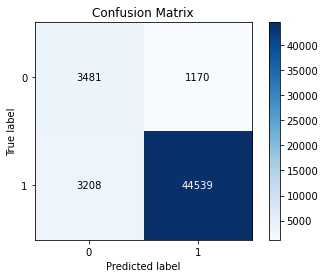

In [104]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [105]:
cross_val_score(dt,X_scaler,Y,cv=5).mean()

0.9172439920834512

# GradientBoostingClassifer Mode

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
gdbt_clf= GradientBoostingClassifier()
gdbt_clf.fit(x_train,y_train)
y_pred=gdbt_clf.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62      6689
           1       0.93      0.98      0.96     45709

    accuracy                           0.92     52398
   macro avg       0.86      0.74      0.79     52398
weighted avg       0.91      0.92      0.91     52398



In [109]:
#print Confusion Matrix
print(confusion_matrix(y_pred,y_test))

[[ 3392   923]
 [ 3297 44786]]


In [110]:
#model score
gdbt_clf.score(x_train,y_train)

0.9203023016145654

# Hyperparameter Tuning of GradientBoostClassifer Model

In [111]:
param={'loss':['deviance'],
    'learning_rate':[0.01,0.02,.1,.2,.7],
    'n_estimators':[50,100,150,200],
    'subsample':[1.0,2,4,6]}

In [112]:
#grid search 
grid_search=GridSearchCV(gdbt_clf,param_grid=param,cv=5,n_jobs=-1)

In [113]:
#fit gridsearch into model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.1, 0.2, 0.7],
                         'loss': ['deviance'],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [1.0, 2, 4, 6]})

In [114]:
#findout best parameters
grid_search.best_params_

{'learning_rate': 0.2,
 'loss': 'deviance',
 'n_estimators': 200,
 'subsample': 1.0}

In [116]:
#initiate with new parameters 
gdbt_clf=GradientBoostingClassifier(learning_rate=0.2,loss='deviance',n_estimators=200,subsample=1)

In [117]:
#train data set with new parameters
gdbt_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, subsample=1)

In [118]:
#model accuracy
gdbt_clf.score(x_train,y_train)

0.9255124241383259

In [119]:
#classification report post tuning
pred=gdbt_clf.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.78      0.64      4692
           1       0.98      0.94      0.96     47706

    accuracy                           0.92     52398
   macro avg       0.76      0.86      0.80     52398
weighted avg       0.94      0.92      0.93     52398



In [120]:
#print confusion Matrix
print(confusion_matrix(pred,y_test))

[[ 3665  1027]
 [ 3024 44682]]


In [121]:
#Cross Validation of GradientBoostClassifier model
cross_val_score(gdbt_clf,X_scaler,Y,cv=5).mean()

0.922258487849741

Model Score 92% and cross_val_score= 92% model gdbt_clf model is quite accurate 

In [122]:
#plot auc roc curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

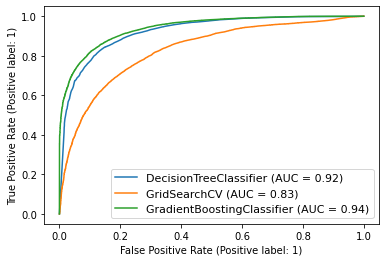

In [124]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(grid_Lr,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(gdbt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [125]:
#as per roc_plot GradientBoostingClassifier model is best among all excuted will save for future use
#model Saving
import pickle
file='pikle_gdbd_clf_model'
with open(file ,'wb') as file:
    pickle.dump(gdbt_clf, file) 